### Importación de dependencias, inicialización del dataframe y vista de valores nulos del dataset 

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("final_data.csv")
print(df.isnull().sum())



player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64


### Vista de los tipos de dato del dataframe

In [16]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

### Renombrando las columnas para comprender mejor de qupe se tratan

In [17]:
traduccion_columnas = {
    'player': 'id_jugador',
    'team': 'equipo',
    'name': 'nombre',
    'position': 'posicion',
    'height': 'altura',
    'age': 'edad',
    'appearance': 'apariciones',
    'goals': 'goles',
    'assists': 'asistencias',
    'yellow cards': 'tarjetas_amarillas',
    'red cards': 'tarjetas_rojas',
    'goals conceded': 'goles_concedidos',
    'clean sheets': 'porterias_a_cero',
    'minutes played': 'minutos_jugados',
    'days_injured': 'dias_lesionado',
    'games_injured': 'partidos_perdidos_lesion',
    'award': 'premios',
    'current_value': 'valor_actual',
    'highest_value': 'valor_maximo',
    'position_encoded': 'posicion_codificada',
    'winger': 'extremo'
}

df = df.rename(columns=traduccion_columnas)

df

,id_jugador,equipo,nombre,posicion,altura,edad,apariciones,goles,asistencias,tarjetas_amarillas,...,goles_concedidos,porterias_a_cero,minutos_jugados,dias_lesionado,partidos_perdidos_lesion,premios,valor_actual,valor_maximo,posicion_codificada,extremo
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


### Traducción de las posiciones de los jugadores
- Para nuestro beneficio este dataset trajo las 4 principales posiciones ya coidifacadas en 1, 2, 3 y 4
1. Arquero
2. Defensor
3. Medio Campista
4. Delantero

In [18]:
posiciones = df["posicion_codificada"].unique()
print(posiciones)

df["posicion"] = df["posicion"].replace({'Goalkeeper': 'Portero',
    'Defender Centre-Back': 'Defensa Central',
    'Defender Left-Back': 'Lateral Izquierdo',
    'Defender Right-Back': 'Lateral Derecho',
    'midfield-DefensiveMidfield': 'Centrocampista Defensivo',
    'midfield-CentralMidfield': 'Centrocampista Central',
    'midfield-AttackingMidfield': 'Centrocampista Ofensivo',
    'Attack-LeftWinger': 'Extremo Izquierdo',
    'Attack-RightWinger': 'Extremo Derecho',
    'Attack Centre-Forward': 'Delantero Centro',
    'midfield-RightMidfield': 'Centrocampista Derecho',
    'midfield-LeftMidfield': 'Centrocampista Izquierdo',
    'Attack-SecondStriker': 'Segundo Delantero',
    'midfield': 'Centrocampista',
    'Attack': 'Delantero',
    'Defender': 'Defensa'})

[1 2 3 4]


- Sólo verificando que todo esté bien

In [19]:
df

,id_jugador,equipo,nombre,posicion,altura,edad,apariciones,goles,asistencias,tarjetas_amarillas,...,goles_concedidos,porterias_a_cero,minutos_jugados,dias_lesionado,partidos_perdidos_lesion,premios,valor_actual,valor_maximo,posicion_codificada,extremo
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Portero,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Portero,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Portero,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defensa Central,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defensa Central,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Extremo Derecho,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Delantero Centro,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Delantero Centro,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Delantero Centro,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


### Inicilización, separación de los datos y entrenamiento de nuestro modelo de regresión lineal

In [20]:
modelo = LinearRegression()
xTrain = df[["posicion_codificada","altura", "edad", "apariciones", "goles", "asistencias", "goles_concedidos", "porterias_a_cero", "minutos_jugados", "dias_lesionado", "partidos_perdidos_lesion", "premios"]]
yTrain = df["valor_actual"]
modelo.fit(xTrain, yTrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Primera predicción de nuestro modelo

In [21]:
prediccion = modelo.predict([[4,174,17,10,25,10,0,0,2000,0,0,5]])
print(f"Valor de mercado por ${prediccion[0].astype(int)}")

Valor de mercado por $79019209


c:\Users\marcelo\Desktop\tlp3-Tp-Final\Backend\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Error cuadrático medio
- Obteniendo el error cuadrático medio y haciendo la predicción de todos los datos de entrenamiento

In [22]:
y_pred = modelo.predict(xTrain)
mse = mean_squared_error(yTrain, y_pred)

print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 59355574702448.836


### Exportando nuestro modelo para utilizarlo en nuestro Backend

In [23]:
import joblib

joblib.dump(modelo, 'modelo_regression_coste_jugador.pkl')

['modelo_regression_coste_jugador.pkl']

### Probando el modelo exportado

In [24]:
modelo_probar = joblib.load('modelo_regression_coste_jugador.pkl')
modelo_probar.predict([[3,174,32,4,4,10,0,0,5000,0,0,5]])

c:\Users\marcelo\Desktop\tlp3-Tp-Final\Backend\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48712822.69649628])

### Viendo las diferencias entre los datos de entrenamiento y los datos predichos por el modelo

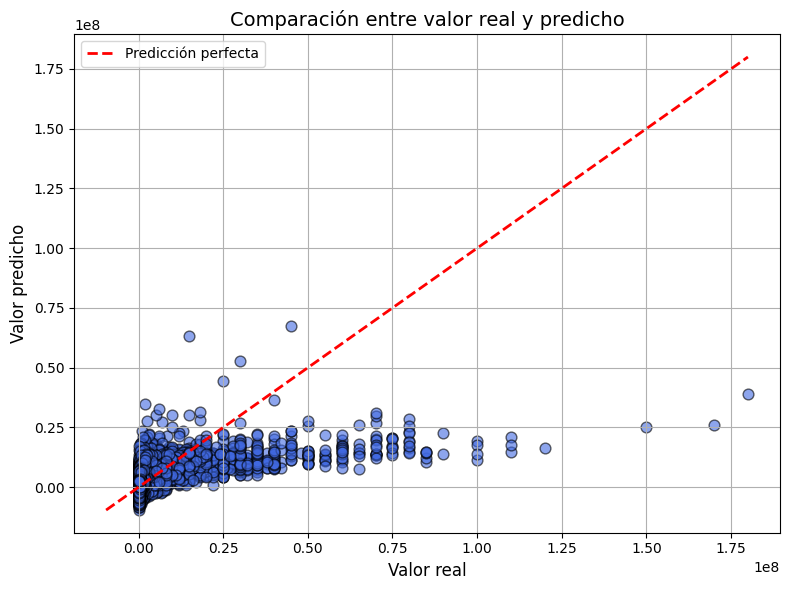

In [25]:

plt.figure(figsize=(8, 6))

plt.scatter(yTrain, y_pred, alpha=0.6, color='royalblue', edgecolors='black', s=60)

min_val = min(yTrain.min(), y_pred.min())
max_val = max(yTrain.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', linewidth=2, label='Predicción perfecta')

plt.xlabel("Valor real", fontsize=12)
plt.ylabel("Valor predicho", fontsize=12)
plt.title("Comparación entre valor real y predicho", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
